# AgroUS

Machine learning project for predicting Production, Supply and Distribution of World Agricultural Commodities

Dmitriy Khodykin d.hodikin@yandex.ru

In [1]:
# imports
import pandas
import matplotlib.pyplot as plt
import seaborn

## Import data

Returns a set of records with Forecast number for a given Commodity Code (Ex, 0440000 for Corn) and a given Market Year (Ex, 2017) for all applicable countries. PSD Database has data for most commodities since year 1960.

In [2]:
data = pandas.read_parquet('../data/data.parquet')

In [3]:
data.head()

,commodityCode,countryCode,marketYear,calendarYear,month,attributeId,unitId,value,commodityName,attributeName,unitDescription
0,0577400,GR,1990,1991,00,1,12,45400.0,"Almonds, Shelled Basis",Area Planted,(HA)
1,0577400,GR,1990,1991,00,4,12,41500.0,"Almonds, Shelled Basis",Area Harvested,(HA)
2,0577400,GR,1990,1991,00,17,10,15100.0,"Almonds, Shelled Basis",Bearing Trees,(1000 TREES)
3,0577400,GR,1990,1991,00,19,10,800.0,"Almonds, Shelled Basis",Non-Bearing Trees,(1000 TREES)
4,0577400,GR,1990,1991,00,16,10,15900.0,"Almonds, Shelled Basis",Total Trees,(1000 TREES)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410644 entries, 0 to 1410643
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   commodityCode    1410644 non-null  object 
 1   countryCode      1410644 non-null  object 
 2   marketYear       1410644 non-null  object 
 3   calendarYear     1410644 non-null  object 
 4   month            1410644 non-null  object 
 5   attributeId      1410644 non-null  int64  
 6   unitId           1410644 non-null  int64  
 7   value            1410644 non-null  float64
 8   commodityName    1410644 non-null  object 
 9   attributeName    1410644 non-null  object 
 10  unitDescription  1410644 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 129.1+ MB


## Analytics data

In [5]:
data['commodityName'].value_counts()

Sugar, Centrifugal          75760
Cotton                      55770
Wheat                       55650
Corn                        55215
Coffee, Green               53375
                            ...  
Orange Juice                 4653
Mixed Grain                  2655
Oilseed, Soybean (Local)     1260
Meal, Soybean (Local)        1260
Oil, Soybean (Local)         1200
Name: commodityName, Length: 64, dtype: int64

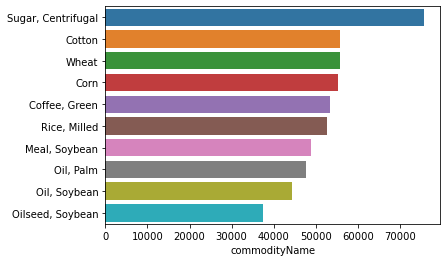

In [6]:
# Subset TOP-10 Commodities
top_10 = data['commodityName'].value_counts().head(10)

seaborn.barplot(
    x = top_10, 
    y = top_10.index
);

### Common Code

In [61]:
def show_plot(data, x_label, y_label, attribute_name):
    """
    Show seaborn barplot.
    """
    seaborn.lineplot(
        x = data[x_label], 
        y = data[y_label])
    plt.suptitle(f'{attribute_name}', 
                 fontsize=16)
    plt.xticks(rotation=90)
    plt.show();

### Sugar

In [7]:
data[data['commodityName'] == 'Sugar, Centrifugal'].head()

,commodityCode,countryCode,marketYear,calendarYear,month,attributeId,unitId,value,commodityName,attributeName,unitDescription
1262030,0612000,AF,1990,1989,00,20,8,55.0,"Sugar, Centrifugal",Beginning Stocks,(1000 MT)
1262031,0612000,AF,1990,1989,00,30,8,3.0,"Sugar, Centrifugal",Beet Sugar Production,(1000 MT)
1262032,0612000,AF,1990,1989,00,43,8,7.0,"Sugar, Centrifugal",Cane Sugar Production,(1000 MT)
1262033,0612000,AF,1990,1989,00,28,8,10.0,"Sugar, Centrifugal",Production,(1000 MT)
1262034,0612000,AF,1990,1989,00,64,8,90.0,"Sugar, Centrifugal",Raw Imports,(1000 MT)


In [56]:
unique_country_codes = set(data['countryCode'])
print(sorted(unique_country_codes))

['AC', 'AF', 'AG', 'AJ', 'AL', 'AM', 'AO', 'AR', 'AS', 'AU', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BK', 'BL', 'BM', 'BO', 'BP', 'BR', 'BT', 'BU', 'BX', 'BY', 'CA', 'CB', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CM', 'CN', 'CO', 'CS', 'CT', 'CU', 'CV', 'CY', 'CZ', 'DA', 'DJ', 'DM', 'DR', 'E2', 'E3', 'E4', 'EC', 'EG', 'EI', 'EK', 'EN', 'ER', 'ES', 'ET', 'EZ', 'FI', 'FJ', 'FO', 'FR', 'GA', 'GB', 'GC', 'GE', 'GG', 'GH', 'GI', 'GJ', 'GM', 'GN', 'GR', 'GT', 'GU', 'GY', 'GZ', 'HA', 'HK', 'HO', 'HR', 'HU', 'IC', 'ID', 'IN', 'IR', 'IS', 'IT', 'IV', 'IZ', 'JA', 'JM', 'JO', 'KE', 'KG', 'KN', 'KS', 'KU', 'KZ', 'LA', 'LE', 'LG', 'LH', 'LI', 'LO', 'LT', 'LY', 'MA', 'MC', 'MD', 'MG', 'MI', 'MJ', 'MK', 'ML', 'MO', 'MP', 'MR', 'MT', 'MU', 'MV', 'MX', 'MY', 'MZ', 'NA', 'NC', 'NG', 'NH', 'NI', 'NL', 'NO', 'NP', 'NS', 'NU', 'NZ', 'OD', 'PA', 'PE', 'PK', 'PL', 'PN', 'PO', 'PP', 'PU', 'QA', 'RB', 'RE', 'RH', 'RO', 'RP', 'RQ', 'RS', 'RW', 'S8', 'SA', 'SC', 'SE', 'SF', 'SG', 'SI', 'SL', 'SN', 'SO', 'SP

In [57]:
unique_attribute_names = set(data['attributeName'])
print(sorted(unique_attribute_names))

['Annual % Change Per Cap. Cons.', 'Arabica Production', 'Area Harvested', 'Area Planted', 'Balance', 'Bean Exports', 'Bean Imports', 'Bearing Trees', 'Beef Cows Beg. Stocks', 'Beet Sugar Production', 'Beginning Stocks', 'CY Exp. to U.S.', 'CY Exports', 'CY Imp. from U.S.', 'CY Imports', 'Calf Slaughter', 'Cane Sugar Production', 'Catch For Reduction', 'Commercial Production', 'Consumption Change', 'Cow Change', 'Cow Slaughter', 'Cows In Milk', 'Cows Milk Production', 'Crush', 'Dairy Cows Beg. Stocks', 'Deliv. To Processors', 'Domestic Consumption', 'Ending Stocks', 'Export Change', 'Exportable Production', 'Exports', 'Exports Percent Production', 'Extr. Rate, 999.9999', 'FSI Consumption', 'Factory Use Consum.', 'Feed Dom. Consumption', 'Feed Use Dom. Consum.', 'Feed Waste Dom. Cons.', 'Fluid Use Dom. Consum.', 'Food Use Dom. Cons.', 'For Processing', 'Fresh Dom. Consumption', 'Human Consumption', 'Human Dom. Consumption', 'Import Change', 'Imports', 'Imports Percent Consumption', 'Ind

In [20]:
# Production in the USA
sugar_production_usa = data[(data['commodityName'] == 'Sugar, Centrifugal') & \
                            (data['attributeName'] == 'Production') & \
                            (data['countryCode'] == 'US')] \
                            [['countryCode', 'marketYear', 'calendarYear', 
                              'month', 'value', 'unitDescription']]

In [36]:
sugar_production_usa.sort_values('marketYear').tail()

,countryCode,marketYear,calendarYear,month,value,unitDescription
1327969,US,2015,2018,11,7853.0,(1000 MT)
1330369,US,2016,2021,05,8155.0,(1000 MT)
1332785,US,2017,2021,05,8137.0,(1000 MT)
1335201,US,2018,2021,05,8430.0,(1000 MT)
1337617,US,2019,2021,05,8164.0,(1000 MT)


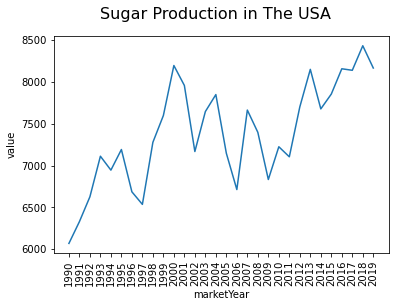

In [45]:
show_plot(
    sugar_production_usa, 
    'marketYear', 
    'value', 
    'Sugar Production in The USA'
    )

In [59]:
# Ending Stocks in the USA
sugar_ending_stocks_usa = data[(data['commodityName'] == 'Sugar, Centrifugal') & \
                               (data['attributeName'] == 'Ending Stocks') & \
                               (data['countryCode'] == 'US')] \
                                [['countryCode', 'marketYear', 'calendarYear', 
                                  'month', 'value', 'unitDescription']]

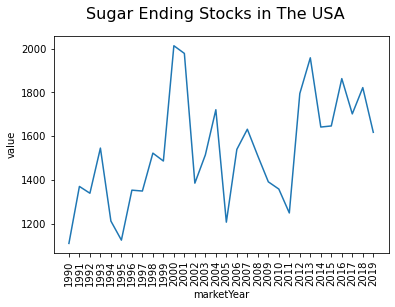

In [60]:
show_plot(
    sugar_ending_stocks_usa, 
    'marketYear', 
    'value', 
    'Sugar Ending Stocks in The USA'
    )

In [62]:
# Area Planted in the USA
sugar_area_planted_usa = data[(data['commodityName'] == 'Sugar, Centrifugal') & \
                              (data['attributeName'] == 'Area Planted') & \
                              (data['countryCode'] == 'US')] \
                               [['countryCode', 'marketYear', 'calendarYear', 
                                 'month', 'value', 'unitDescription']]

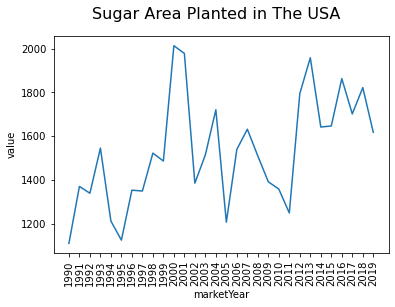

In [63]:
show_plot(
    sugar_ending_stocks_usa, 
    'marketYear', 
    'value', 
    'Sugar Area Planted in The USA'
    )